# Investigating Mobile App Store Data

## I. Introduction

In order to gain improved domain knowledge of the mobile app space, the data set of the most frequently rated mobile apps from the appstore in 2017 will be analyzed. We can answer such questions as:


* Which genres have higher average user ratings?
* Do user ratings in general skew negative or positive?
* Which metrics does the price of an app affect? Are free apps higher rated than paid apps?
* Which variables have the highest correlation with average user rating?

Two metrics that mobile app developers would want to maximize would be: user rating, in a scale from 1-5 we want this be as close to 5 as possible. We would also want to maximize the total number of ratings as the more ratings there are the more credible it is, and the more downloads the app should receive.

Source of data: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

## Getting Started: Loading the data

The data set consists of two csv files one 'AppleStore.csv' contains the metrics of each apps such as average user ratings, prime genre, and price. Whereas 'appleStore_description.csv' contains the description of each app. In this study we will mostly be looking at 'AppleStore.csv' and loading into a variable called `store`.

In [94]:
import os
import numpy as np
import pandas as pd

os.listdir('./data/')

['AppleStore.csv', 'appleStore_description.csv']

In [95]:
store = pd.read_csv('./data/AppleStore.csv')
description = pd.read_csv('./data/appleStore_description.csv')

In [96]:
store=store.drop(['Unnamed: 0','currency'],axis=1,errors='ignore')
print("Data set shape:", store.shape)
display(store.head())

Data set shape: (7197, 15)


,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [97]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 15 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 843.5+ KB


In [98]:
store.drop('id',axis=1).describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


Some things that can be gleaned from the above is that there are 7197 apps in the dataset, with 15 features. The average price of the apps are around $1.70 with most of the apps being free. For ratings the average is 300 total ratings. Average user rating is at 3.5.

In [99]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,4.0,4.5,38,5,10,1
1,158578688,0.00,161065,26,4.0,3.5,37,5,23,1
2,100524032,0.00,188583,2822,3.5,4.5,37,5,3,1
3,128512000,0.00,262241,649,4.0,4.5,37,5,9,1
4,92774400,0.00,985920,5320,4.5,5.0,37,5,45,1


,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
size_bytes,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418
price,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460
user_rating,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094
sup_devices.num,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls.num,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901
lang.num,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000,0.032477
vpp_lic,-0.150418,-0.029942,-0.000982,0.006460,0.069816,0.050094,-0.037109,0.071901,0.032477,1.000000


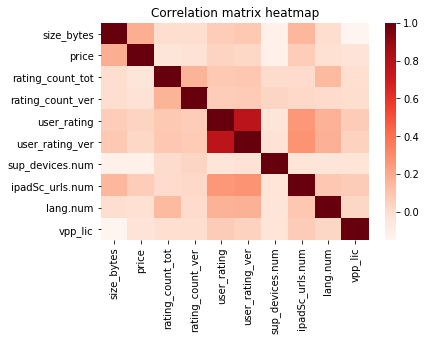

In [100]:
import seaborn as sns

display(store.drop('id',axis=1).corr())
sns.heatmap(data=store.drop('id',axis=1).corr(),cmap='Reds')
plt.title('Correlation matrix heatmap')
plt.show();

In [101]:
print("Average Ratings")
averages = []
for g in store.prime_genre.unique():
    avg = round(np.mean(store[store.prime_genre==g].user_rating),2)
    averages.append((g, avg))
avg_ratings_genre=pd.DataFrame(averages, columns=['genre','average rating']).sort_values(by='average rating',ascending=False).reset_index(drop=True)
avg_ratings_genre

Average Ratings


,genre,average rating
0,Productivity,4.01
1,Music,3.98
2,Photo & Video,3.80
3,Business,3.75
4,Health & Fitness,3.70
5,Games,3.69
6,Weather,3.60
7,Shopping,3.54
8,Reference,3.45
9,Travel,3.38


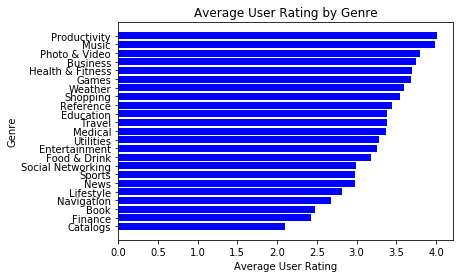

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
avg_ratings_genre=avg_ratings_genre.sort_values(by='average rating',ascending=True).reset_index(drop=True)
plt.barh(y=avg_ratings_genre['genre'],width=avg_ratings_genre['average rating'],
        color='blue')
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.title('Average User Rating by Genre')

plt.show()

As can be seen in the above data frame and bar graph, the apps with the highest average ratings were **Productivity, Music, Photo & Video Apps.** While the genres with the lowest average ratings were **Catalogs, Finance, and Book.**

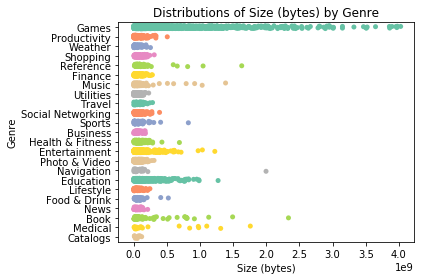

In [127]:
sns.stripplot(y='prime_genre', x='size_bytes', data=store, orient='h',
             jitter=0.15, palette="Set2")
plt.xlabel('Size (bytes)'); plt.ylabel('Genre'); plt.title('Distributions of Size (bytes) by Genre')
plt.tight_layout()
plt.show()

The strip plot above shows the distributions of size in bytes, of each app grouped by genre. Games are usually of larger size and constitute the vast majority of apps that are more than 1GB in size.